In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
df= pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
date_col = ['Date']
df[date_col].apply(pd.to_datetime)

,Date
0,2015-12-27
1,2015-12-20
2,2015-12-13
3,2015-12-06
4,2015-11-29
...,...
18244,2018-02-04
18245,2018-01-28
18246,2018-01-21
18247,2018-01-14


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df2 = df.query('year == 2015 and type == "conventional" and region == "Albany"')[['Date', 'Total Bags', 'Small Bags']]
df2.head()

,Date,Total Bags,Small Bags
0,2015-12-27,8696.87,8603.62
1,2015-12-20,9505.56,9408.07
2,2015-12-13,8145.35,8042.21
3,2015-12-06,5811.16,5677.40
4,2015-11-29,6183.95,5986.26


In [8]:
df_melted = pd.melt(df, id_vars='Date', value_vars=['Total Bags','Small Bags'], var_name='Bags', value_name='Count')
df_melted

,Date,Bags,Count
0,2015-12-27,Total Bags,8696.87
1,2015-12-20,Total Bags,9505.56
2,2015-12-13,Total Bags,8145.35
3,2015-12-06,Total Bags,5811.16
4,2015-11-29,Total Bags,6183.95
...,...,...,...
36493,2018-02-04,Small Bags,13066.82
36494,2018-01-28,Small Bags,8940.04
36495,2018-01-21,Small Bags,9351.80
36496,2018-01-14,Small Bags,10919.54


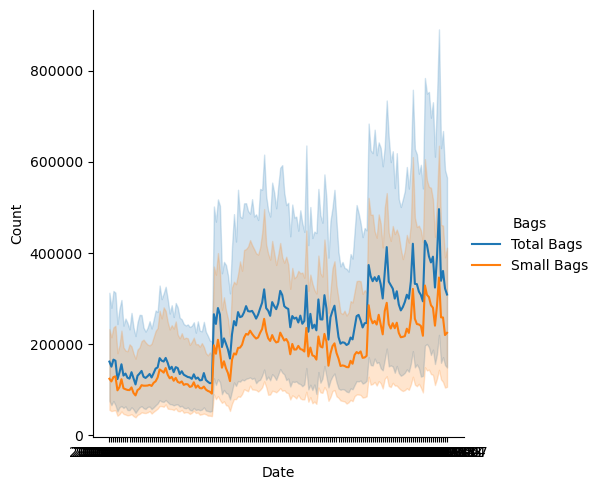

In [9]:
sns.relplot(data=df_melted, kind='line', x='Date', y='Count', hue='Bags')

In [10]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [11]:
df['Sales Volume'] = pd.qcut(df.Total_Volume, q=4, labels=['Poor', 'Modest', 'Good', 'Excellent'])
df.head()

,Unnamed:_0,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Sales Volume
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Modest
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Modest
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Good
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Modest
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Modest


In [12]:
sns.countplot(data=df, x= 'year', hue= 'Sales Volume')

<AxesSubplot:xlabel='year', ylabel='count'>

In [13]:
df_melted2 = pd.melt(df, id_vars='year', value_vars=['Small_Bags', 'Large_Bags', 'XLarge_Bags'], var_name='Bags', value_name='Count')
df_melted2

,year,Bags,Count
0,2015,Small_Bags,8603.62
1,2015,Small_Bags,9408.07
2,2015,Small_Bags,8042.21
3,2015,Small_Bags,5677.40
4,2015,Small_Bags,5986.26
...,...,...,...
54742,2018,XLarge_Bags,0.00
54743,2018,XLarge_Bags,0.00
54744,2018,XLarge_Bags,0.00
54745,2018,XLarge_Bags,0.00


In [14]:
sns.relplot(data=df_melted2, kind='line', x='year', y='Count', hue='Bags')

## The Small Bags sell best